## Loading the initial libraries and data

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb

In [2]:
# importing the housing data.(assignment data name has been change to data1.xlsx)
data = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [3]:
# Seeing the data  
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Pre-processing the data

In [4]:
# Seeing the summary of the data
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [5]:
# Seeing the shape of the data
data.shape

(414, 9)

In [6]:
#  Seeing if it has the missing data
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

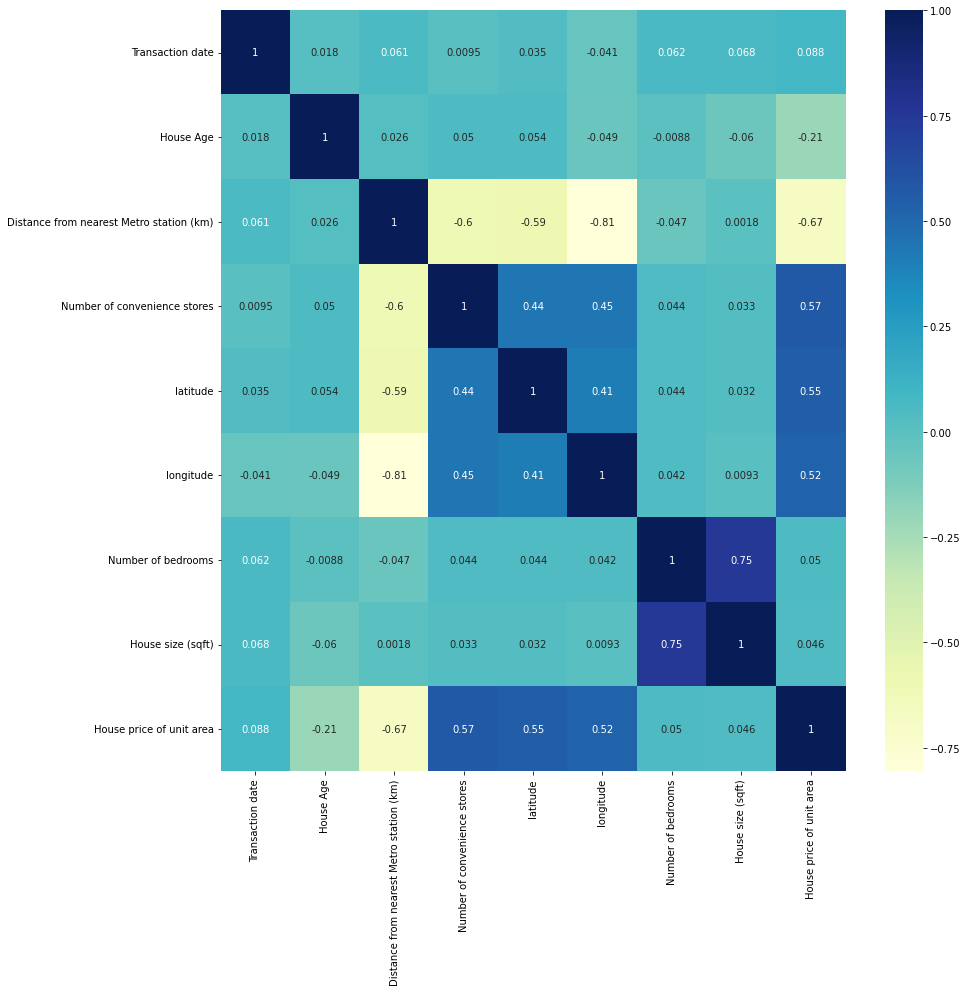

In [7]:
#  Plotting the correlated graph of the data to see correlation between different data
plt.figure(figsize = (14,14))
dataplot = sb.heatmap(data.corr(), cmap = "YlGnBu", annot = True)

**Interpretting the graph**

If 2 features have correlation more than 0.85 or less than -0.85 then there are concern for multicollinearity but in our data no variables has multicollinearity like that. 

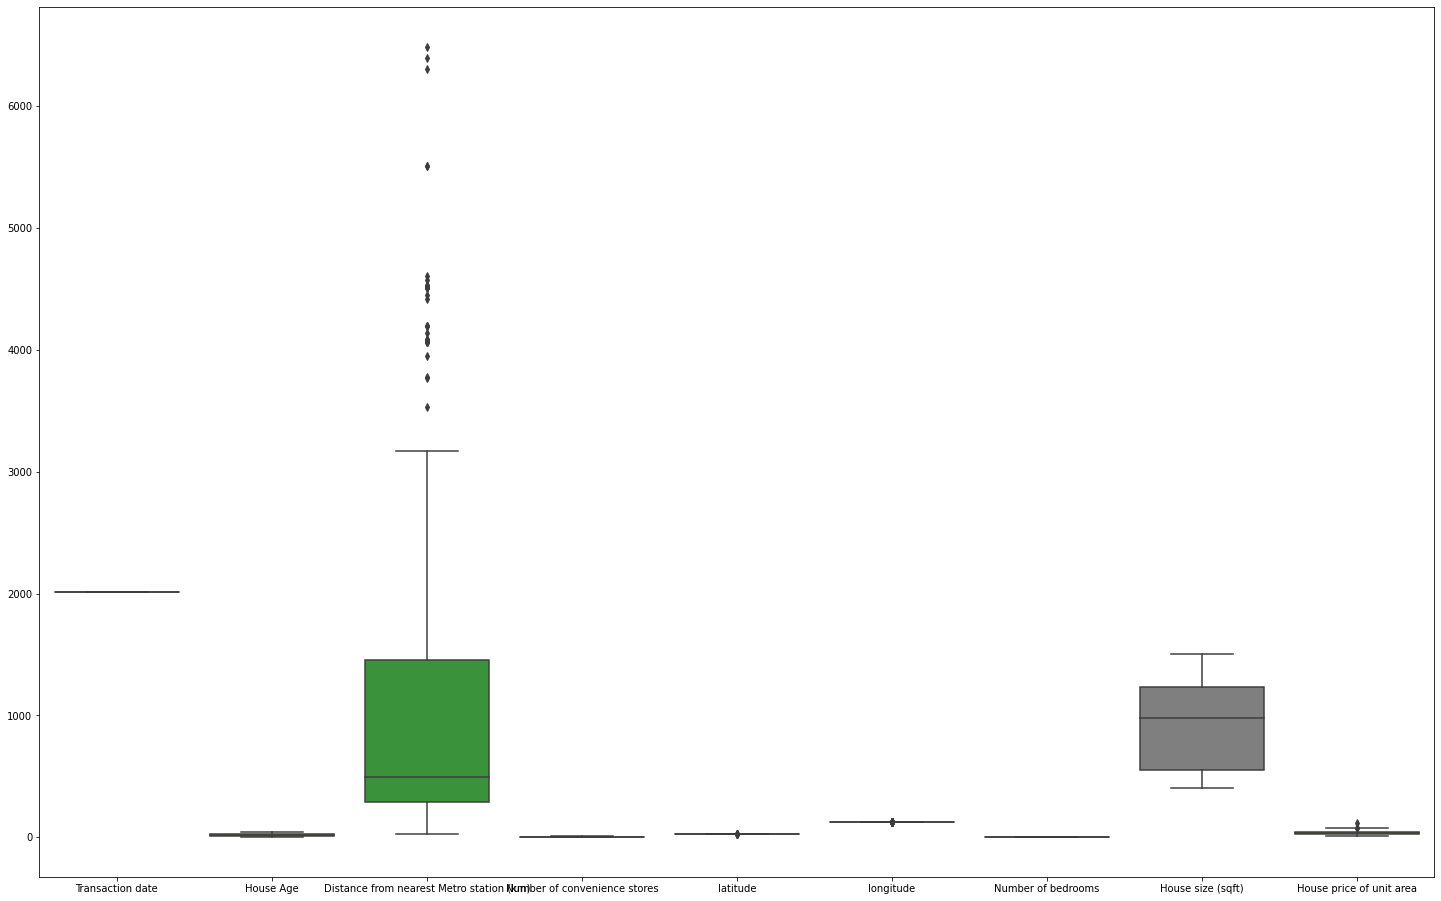

In [8]:
# Seeing the bargraph of the data
plt.figure(figsize = (25,16))
sb.boxplot(data=data)

**Interpretting the bar-graph**

Outliners are present in "Distance from nearest Metro station (km)" but are too less to make any major difference.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

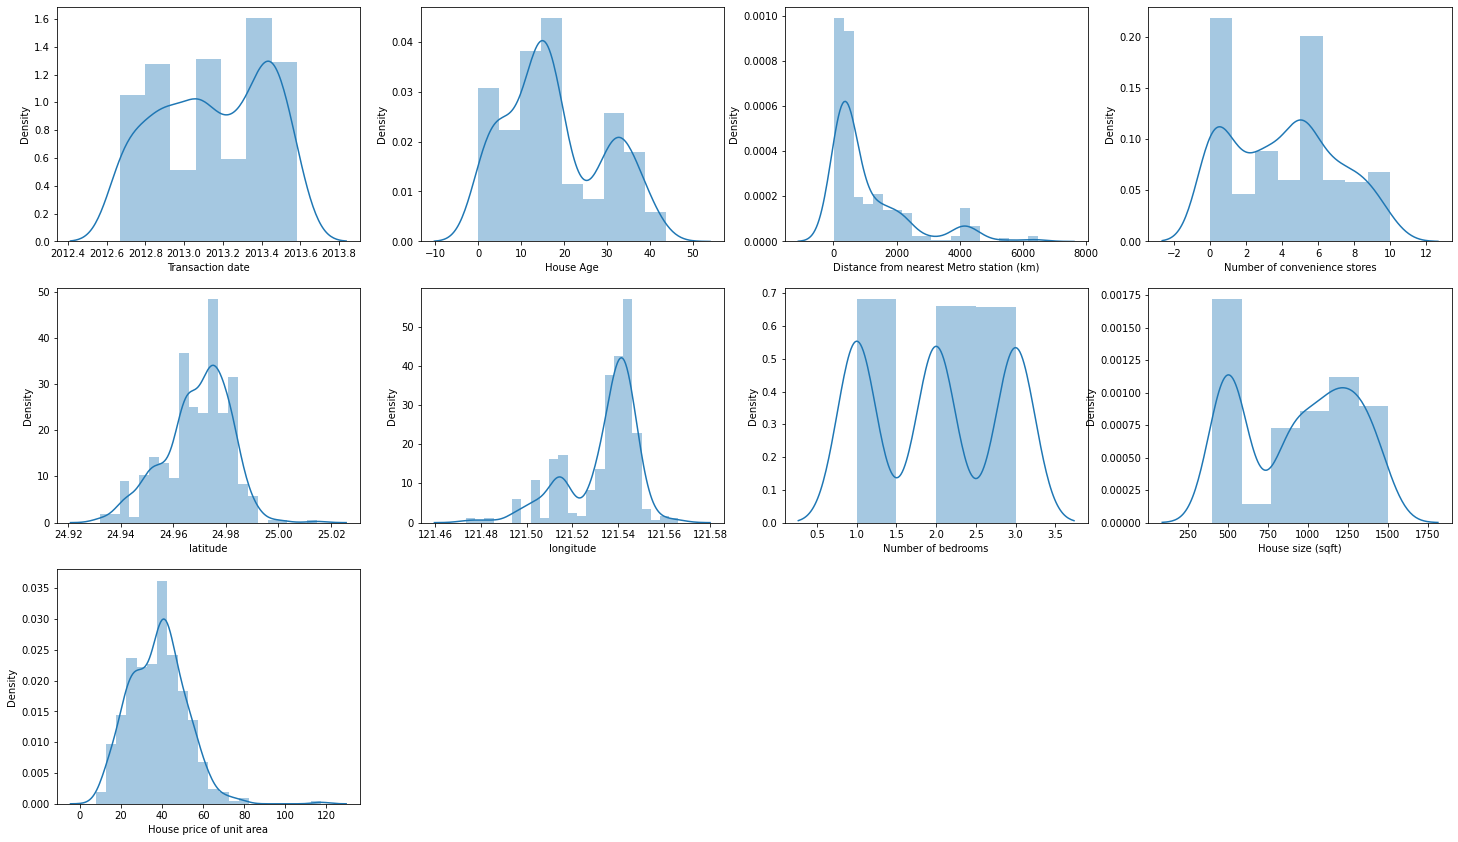

In [9]:
# Seeing the k-density graph of different features
number_of_columns = 9
number_of_rows = 414
h = data.columns.values
plt.figure(figsize=(25,25))
for i in range(0,len(h)):
    plt.subplot(5,4,i+1)
    sb.distplot(data[h[i]],kde=True)

Here many graphs are skewed , so we can apply log or other functions to make them normal. This can be scope for further improvement

Since "transaction date","Distane from nearest Metro Station (Km)" and "House size (sqft)" are out of scaled to other featues so we executed them from data to see the box plot of other features and their outliers. 

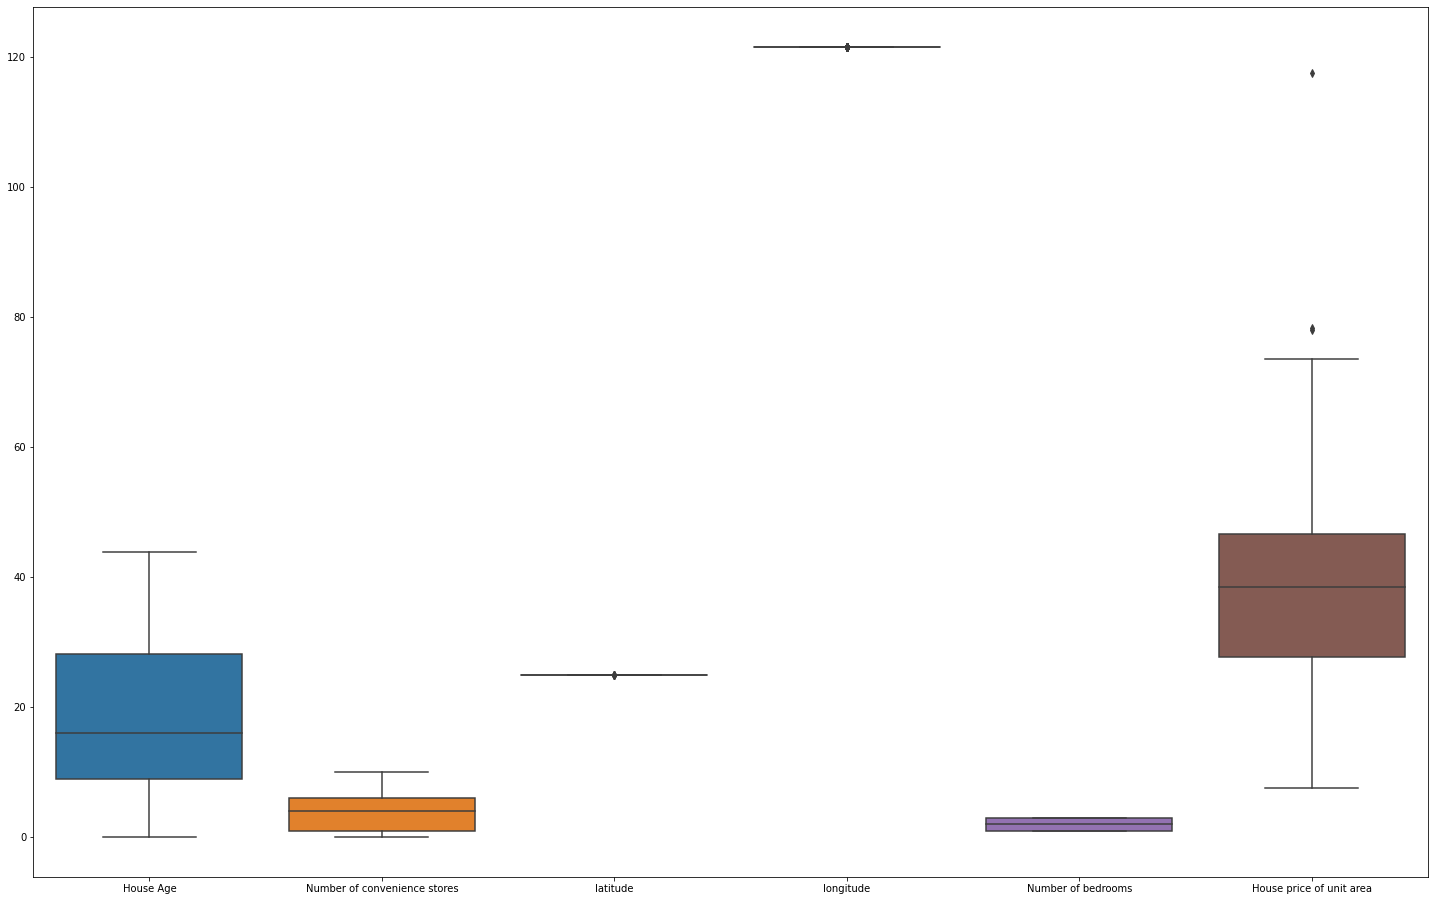

In [10]:
plt.figure(figsize = (25,16))
sb.boxplot(data=data.drop(columns = ['Distance from nearest Metro station (km)','House size (sqft)','Transaction date']))

This shows there are no outliers present which were left unlooked due to scale

In [11]:
# Making x and y datasets
x = data.drop(columns = ["House price of unit area"])
y = data['House price of unit area']

# **Standarizing the data**

In [12]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

In [13]:
x_scaled = scaler.fit_transform(x)

# **Importing Model library**

**Regression vs Classification**

Since in this we have to calculate the price of different products therefore it is Regression models.

**Models we can use -**
1. XGBoost
2. Decission regression models
3. Random Decission regression 
4. Simple linear model
5. Lasso and Ridge regression

In [14]:
# importing the model libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score 

In [15]:
# initializing the models
ridge = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
linear = LinearRegression()
xgb = XGBRFRegressor()

In [16]:
# mean score of ridge models
cross_val_score(ridge,x_scaled,y,cv=5).mean()

0.5767941572367686

In [17]:
# mean score of lasso models
cross_val_score(lasso,x_scaled,y,cv=5).mean()

0.5654836490869973

In [18]:
# mean score of Random Forrest models
cross_val_score(rf,x_scaled,y,cv=5).mean()

0.6880557939889413

In [19]:
# mean score of Decission Tree models
cross_val_score(dt,x_scaled,y,cv=5).mean()

0.26678731902319275

In [20]:
# mean score of XGBoost models
cross_val_score(xgb,x_scaled,y,cv=5).mean()

[21:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:04:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6407186684754385

In [21]:
# mean score of linear models
cross_val_score(linear,x_scaled,y,cv=5).mean()

0.5767137972906353

From this we get that the highest score is of the Random Forrest Model.Maybe this is due to that diiferent tree which are made in the random forrest gives different prediction but there esemble gives the best answers.